In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Simulated sensor data (e.g., temperature readings over time)
time = np.linspace(0, 100, 500)  # Time steps
sensor_data = 50 + 10 * np.sin(0.2 * time)  # Simulated sinusoidal sensor reading


In [3]:
# Define augmentation functions
def add_noise(data, noise_level=0.1):
    """Add Gaussian noise to the data."""
    noise = np.random.normal(0, noise_level * np.std(data), size=data.shape)
    return data + noise


In [4]:
def scale_data(data, scale_factor=1.1):
    """Scale the data by a factor."""
    return data * scale_factor


In [5]:
def time_warp(data, factor=1.5):
    """Stretch or compress time-series data."""
    indices = np.round(np.arange(0, len(data), factor)).astype(int)
    indices = indices[indices < len(data)]
    return data[indices]


In [6]:
# Apply augmentations
noisy_data = add_noise(sensor_data)
scaled_data = scale_data(sensor_data, scale_factor=1.2)
time_warped_data = time_warp(sensor_data, factor=0.8)


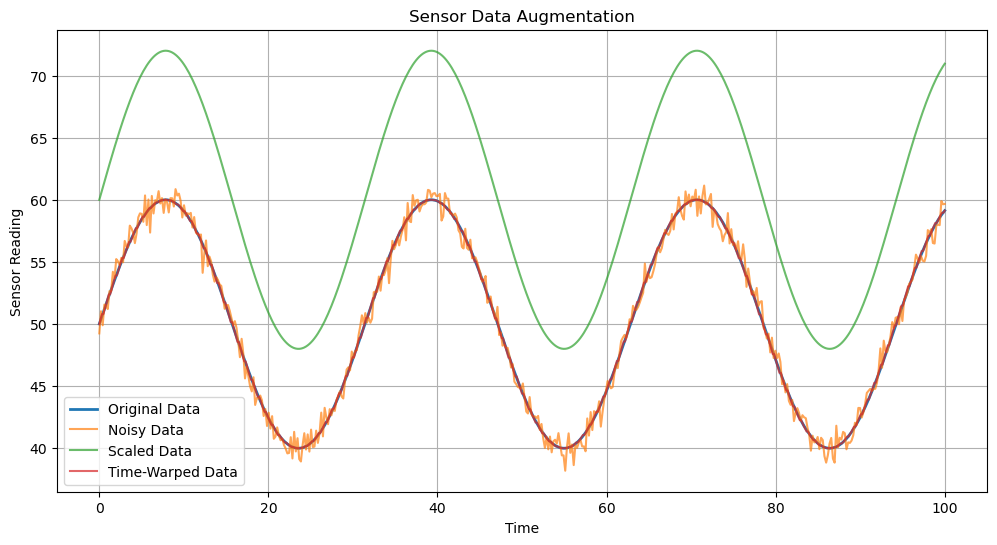

In [7]:
# Plot original and augmented data
plt.figure(figsize=(12, 6))
plt.plot(time, sensor_data, label="Original Data", linewidth=2)
plt.plot(time, noisy_data, label="Noisy Data", alpha=0.7)
plt.plot(time, scaled_data, label="Scaled Data", alpha=0.7)
plt.plot(np.linspace(0, 100, len(time_warped_data)), time_warped_data, label="Time-Warped Data", alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Sensor Reading")
plt.title("Sensor Data Augmentation")
plt.legend()
plt.grid()
plt.show()


In [8]:
import networkx as nx


In [9]:
# Augmentation
augmented_data = add_noise(sensor_data, noise_level=0.05)


In [10]:
# Create a graph with sensor nodes
G = nx.Graph()
G.add_nodes_from(range(5))  # 5 sensors
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4)])  # Example topology



In [13]:
import random



'''''
    Perturbs a graph by adding and removing edges with specified probabilities.
'''''
    Parameters:
        G (nx.Graph): The input graph.
        add_prob (float): Probability of adding an edge between two random nodes.
        remove_prob (float): Probability of removing an existing edge.
'''''
    Returns:
        nx.Graph: The augmented graph.
'''''

In [14]:
def perturb_edges(G, add_prob=0.2, remove_prob=0.1):
   
    # Create a copy of the graph to modify
    augmented_graph = G.copy()
    
    # Remove edges with a given probability
    edges_to_remove = [
        edge for edge in augmented_graph.edges()
        if random.random() < remove_prob
    ]
    augmented_graph.remove_edges_from(edges_to_remove)
    
    # Add edges with a given probability
    nodes = list(augmented_graph.nodes())
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            if not augmented_graph.has_edge(nodes[i], nodes[j]) and random.random() < add_prob:
                augmented_graph.add_edge(nodes[i], nodes[j])
    
    return augmented_graph



In [15]:
# Example usage:
G = nx.erdos_renyi_graph(n=10, p=0.3)  # Create a random graph
augmented_graph = perturb_edges(G, add_prob=0.2, remove_prob=0.1)



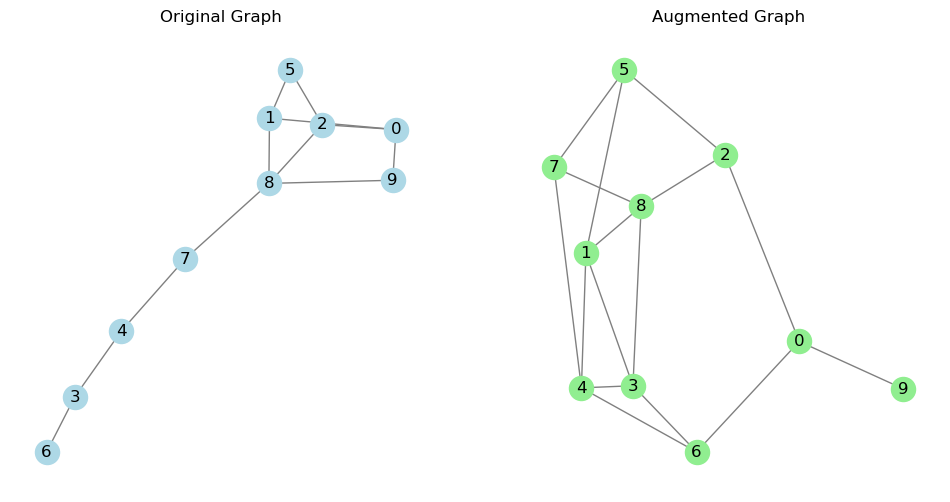

In [16]:
# Visualize the original and augmented graphs (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")

plt.subplot(1, 2, 2)
nx.draw(augmented_graph, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Augmented Graph")

plt.show()
